#  목표

* 결측과 이상치를 이해한다.
* 데이터 특성에 따른 수치 변환, 특성 생성을 할 수 있다.

# 0. 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)
print("missingno: ", msno.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
matplotlib:  3.6.2
missingno:  0.5.1


# 1. 데이터 불러오기

In [3]:
df = pd.read_csv("../data/hr_data.csv", 
                 encoding="utf-8", 
                 index_col=0)
df.head(2)

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
0,1980-7-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes
1,1972-11-8,2011,rnd,married,very high,medium,6.93,5170672,4617495,NaN,no


In [4]:
df.shape

(1470, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   birthday              1470 non-null   object 
 1   entry_year            1470 non-null   int64  
 2   department            1470 non-null   object 
 3   marital_status        1143 non-null   object 
 4   performance_rating    1470 non-null   object 
 5   job_satisfaction      1470 non-null   object 
 6   working_hours         1470 non-null   float64
 7   salary                1470 non-null   int64  
 8   last_year_salary      1470 non-null   int64  
 9   num_companies_worked  1209 non-null   float64
 10  attrition             1470 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 137.8+ KB


# 2. 결측 해결하기

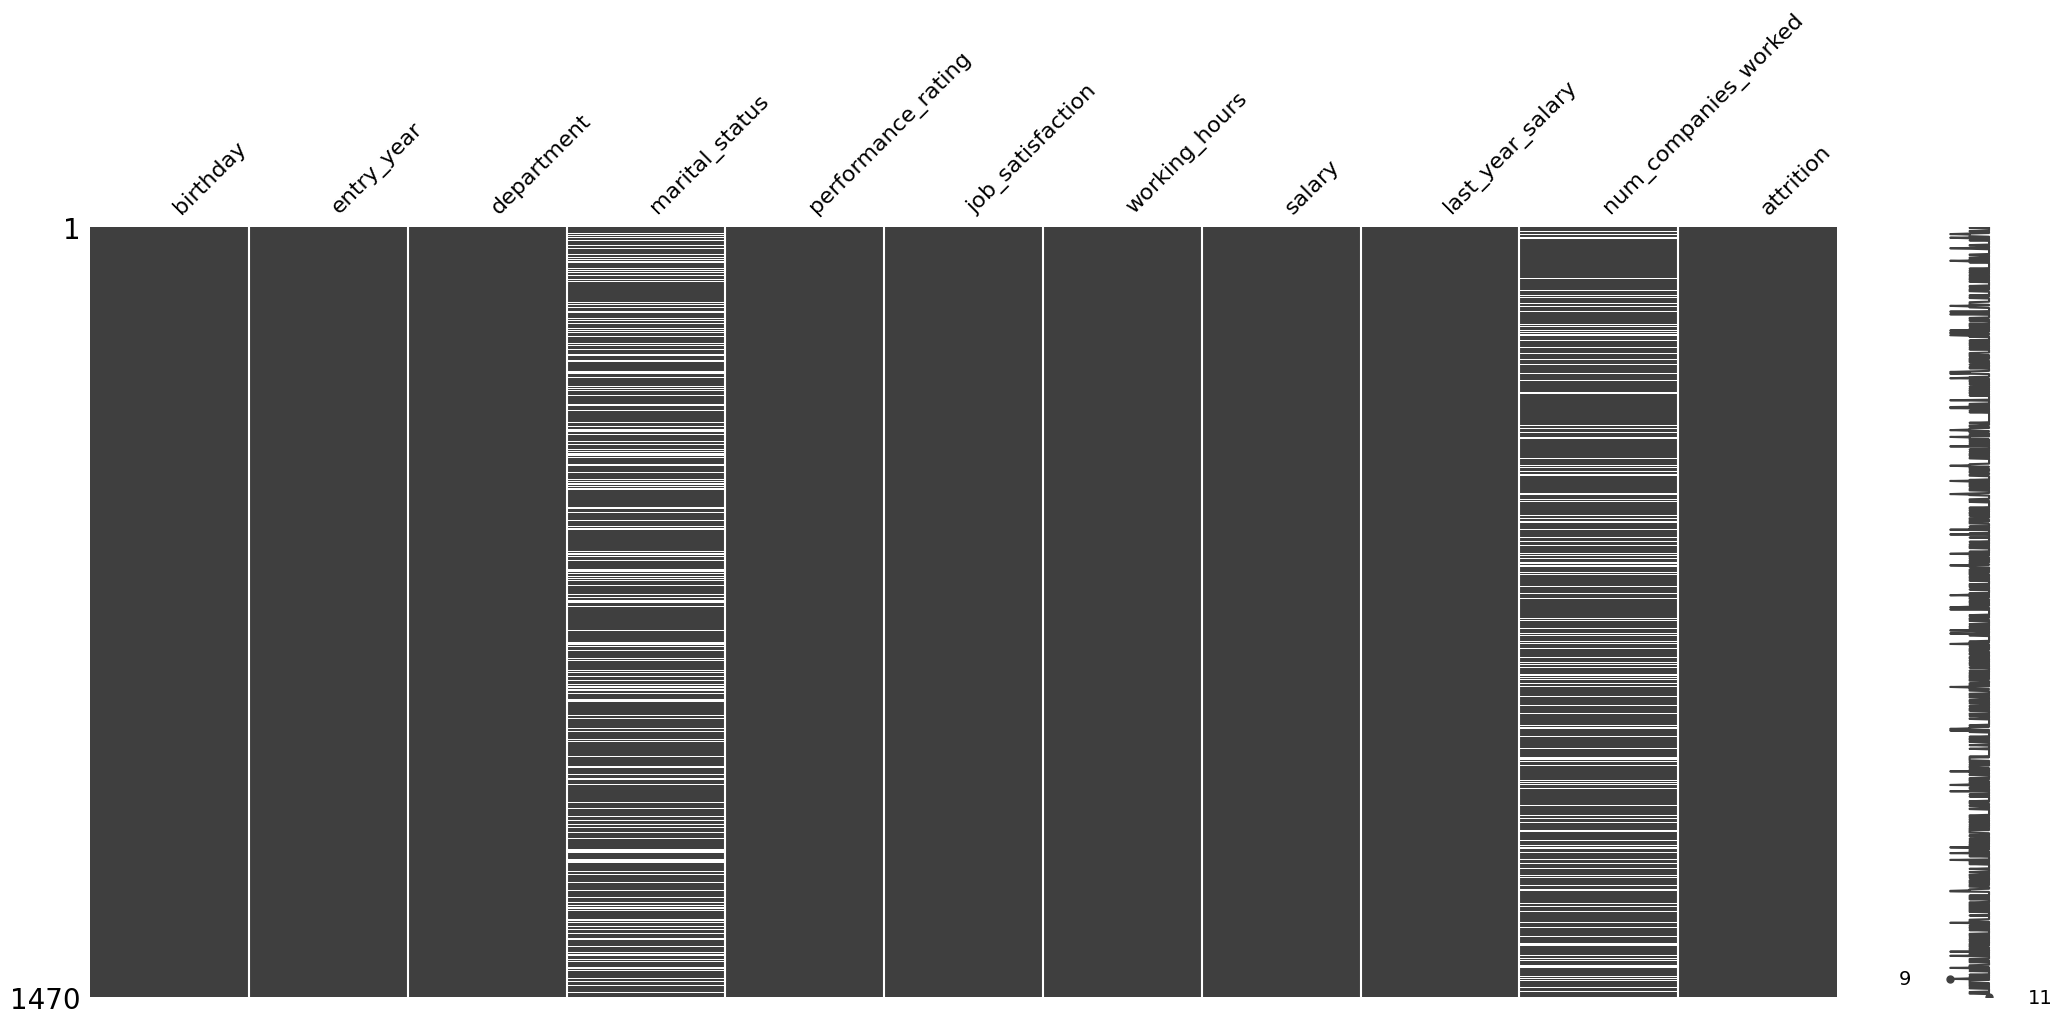

In [6]:
msno.matrix(df);

In [7]:
df[df["marital_status"].isnull()]

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
7,1991-8-24,2020,rnd,NaN,very high,high,7.80,6281496,5637167,1.0,no
12,1990-12-21,2016,rnd,NaN,high,high,6.67,2346000,2153874,1.0,no
13,1987-1-12,2018,rnd,NaN,high,very high,8.33,9420500,8920083,NaN,no
15,1992-12-25,2011,rnd,NaN,high,low,6.67,4159200,3939009,1.0,no
16,1989-1-27,2014,rnd,NaN,high,medium,8.10,7805889,7353640,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...
1441,1965-3-7,2008,rnd,NaN,very high,high,8.10,5394843,4880002,1.0,no
1447,1985-4-29,2006,sales,NaN,very high,very high,8.33,8749750,7783090,1.0,no
1448,1980-4-4,2007,sales,NaN,high,medium,8.10,5713902,5391999,2.0,no
1452,1971-3-7,2009,sales,NaN,high,high,9.00,10164420,9550333,7.0,yes


In [8]:
##결측이 있는 샘플은 몇 개일까?
len(df[df["marital_status"].isnull()])

327

In [9]:
len(df[df["num_companies_worked"].isnull()])

261

In [10]:
a = {1,2,3,4}
b = {3,4,5,6}
a.union(b)

{1, 2, 3, 4, 5, 6}

In [11]:
##중복을 제외하면?
print("the lenth of marital_status & num_companies_worked missing index: ", 
      len(set(df[df["marital_status"].isnull()].index).union(
          set(df[df["num_companies_worked"].isnull()].index))))

the lenth of marital_status & num_companies_worked missing index:  539


## 2.1. numerical

$x = (x_1, x_2, \ldots, x_n)$이라고 하자. 

* 중앙값
    * 값을 크기순으로 나열했을 때 중앙에 오는 값
    * 극단적인 값의 영향을 덜 받음
    
* 평균
    * $\text{mean}(x)=\frac{\sum_{i=1}^nx_i}{n}$
    * 극단적인 값의 영향을 잘 받음



In [12]:
x = [42, 50, 38, 34, 28]

print("x의 중앙값:", np.median(x))
print("x의 평균:", np.mean(x))

x의 중앙값: 38.0
x의 평균: 38.4


In [13]:
xx = [42, 50, 38, 34, 28, 192]

print("xx의 중앙값:", np.median(xx))
print("xx의 평균:", np.mean(xx))

xx의 중앙값: 40.0
xx의 평균: 64.0


In [14]:
## "num_companies_worked"의 중앙값과 평균을 계산해보자.
print("중앙값: ", df["num_companies_worked"].median())
print("평균: ", df["num_companies_worked"].mean())

중앙값:  2.0
평균:  2.7237386269644333


In [15]:
# numpy로 계산해 보기

print("중앙값: ", np.median(df["num_companies_worked"].values))
print("평균: ", np.mean(df["num_companies_worked"].values))

print("중앙값: ", np.nanmedian(df["num_companies_worked"].values))
print("평균: ", np.nanmean(df["num_companies_worked"].values))

중앙값:  nan
평균:  nan
중앙값:  2.0
평균:  2.7237386269644333


In [16]:
## "num_companies_worked"의 평균은 어떻게 나온 결과인가?


In [17]:
# 결측을 median으로 채우자.

df["num_companies_worked"] = df["num_companies_worked"].fillna(df["num_companies_worked"].median())

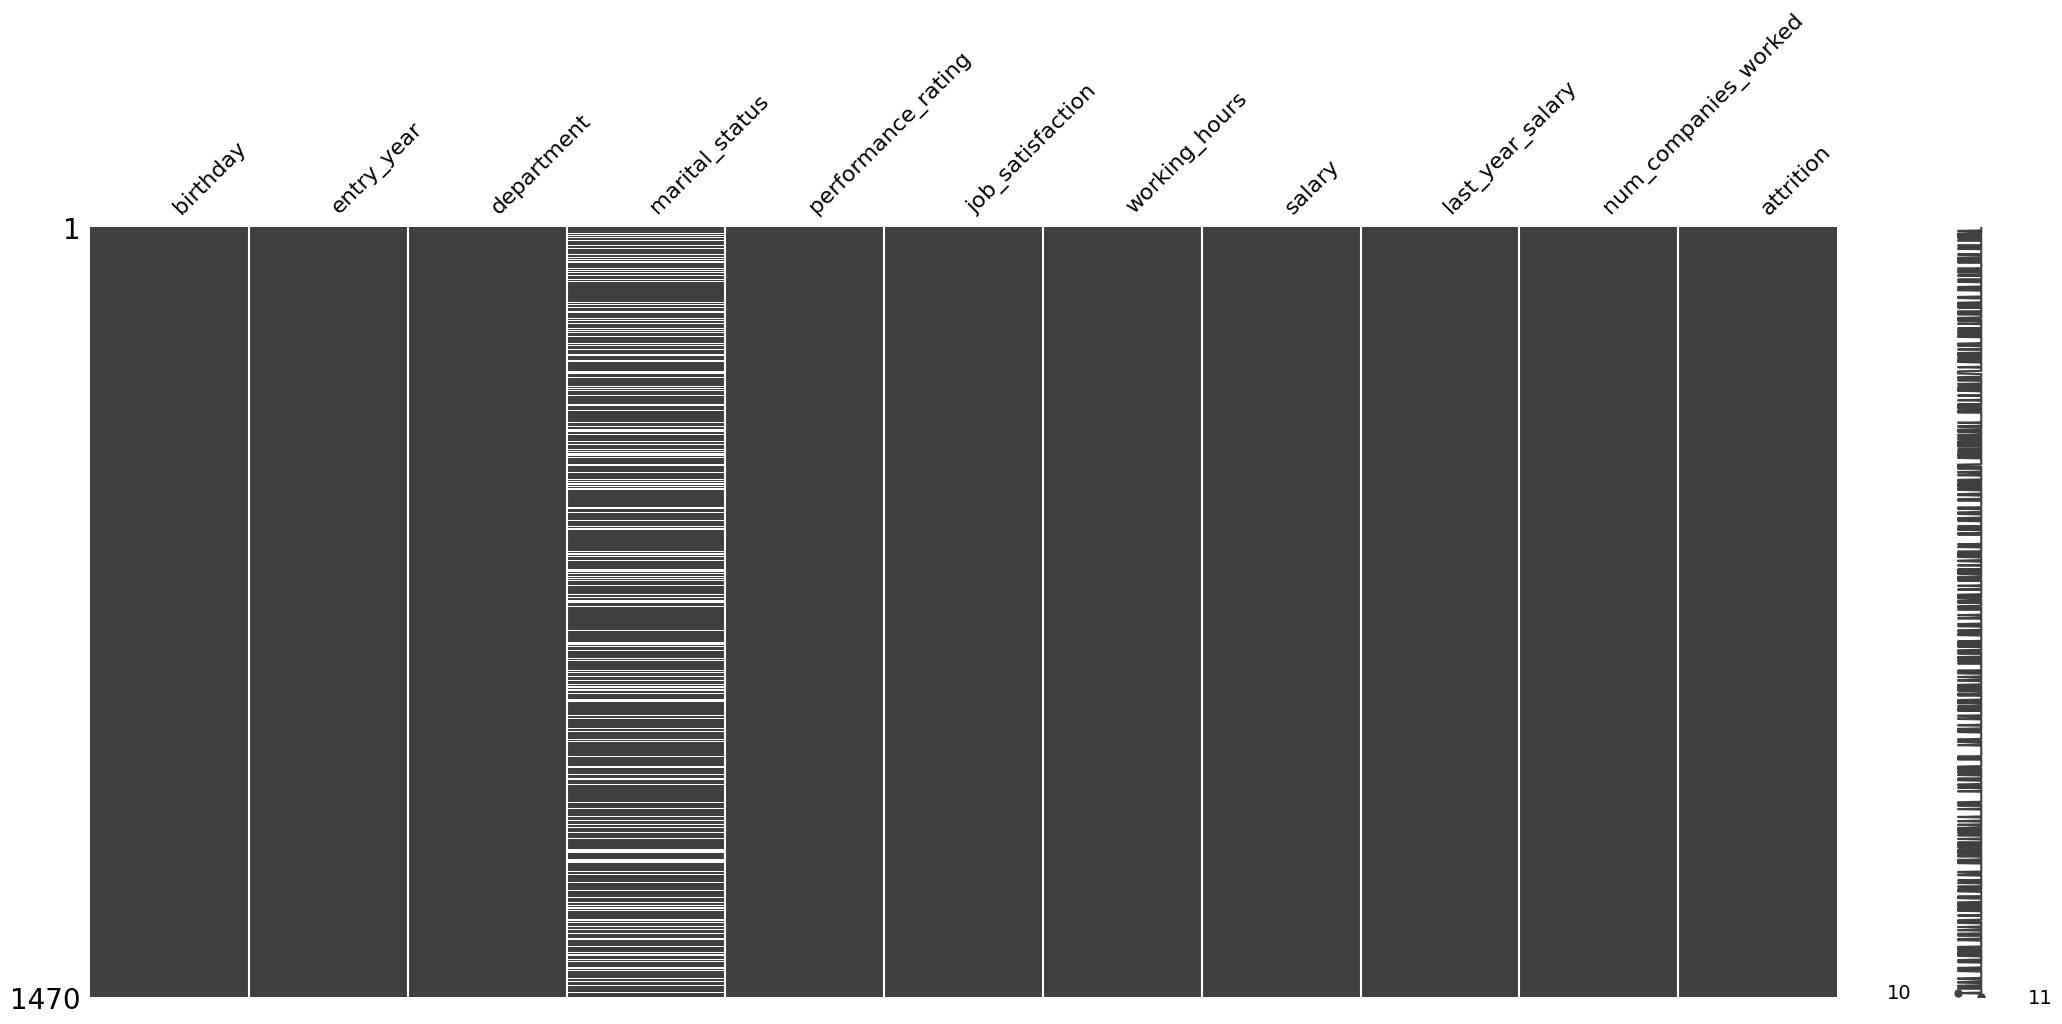

In [18]:
msno.matrix(df);

## 2.2. categorical

* ordinal: 순서가 있음
* norminal: 순서가 없음

In [19]:
df["marital_status"].value_counts()

married    673
single     470
Name: marital_status, dtype: int64

In [20]:
# 결측을 새로운 범주로 채우자.

df["marital_status"] = df["marital_status"].fillna("etc")

In [21]:
df["marital_status"].value_counts()

married    673
single     470
etc        327
Name: marital_status, dtype: int64

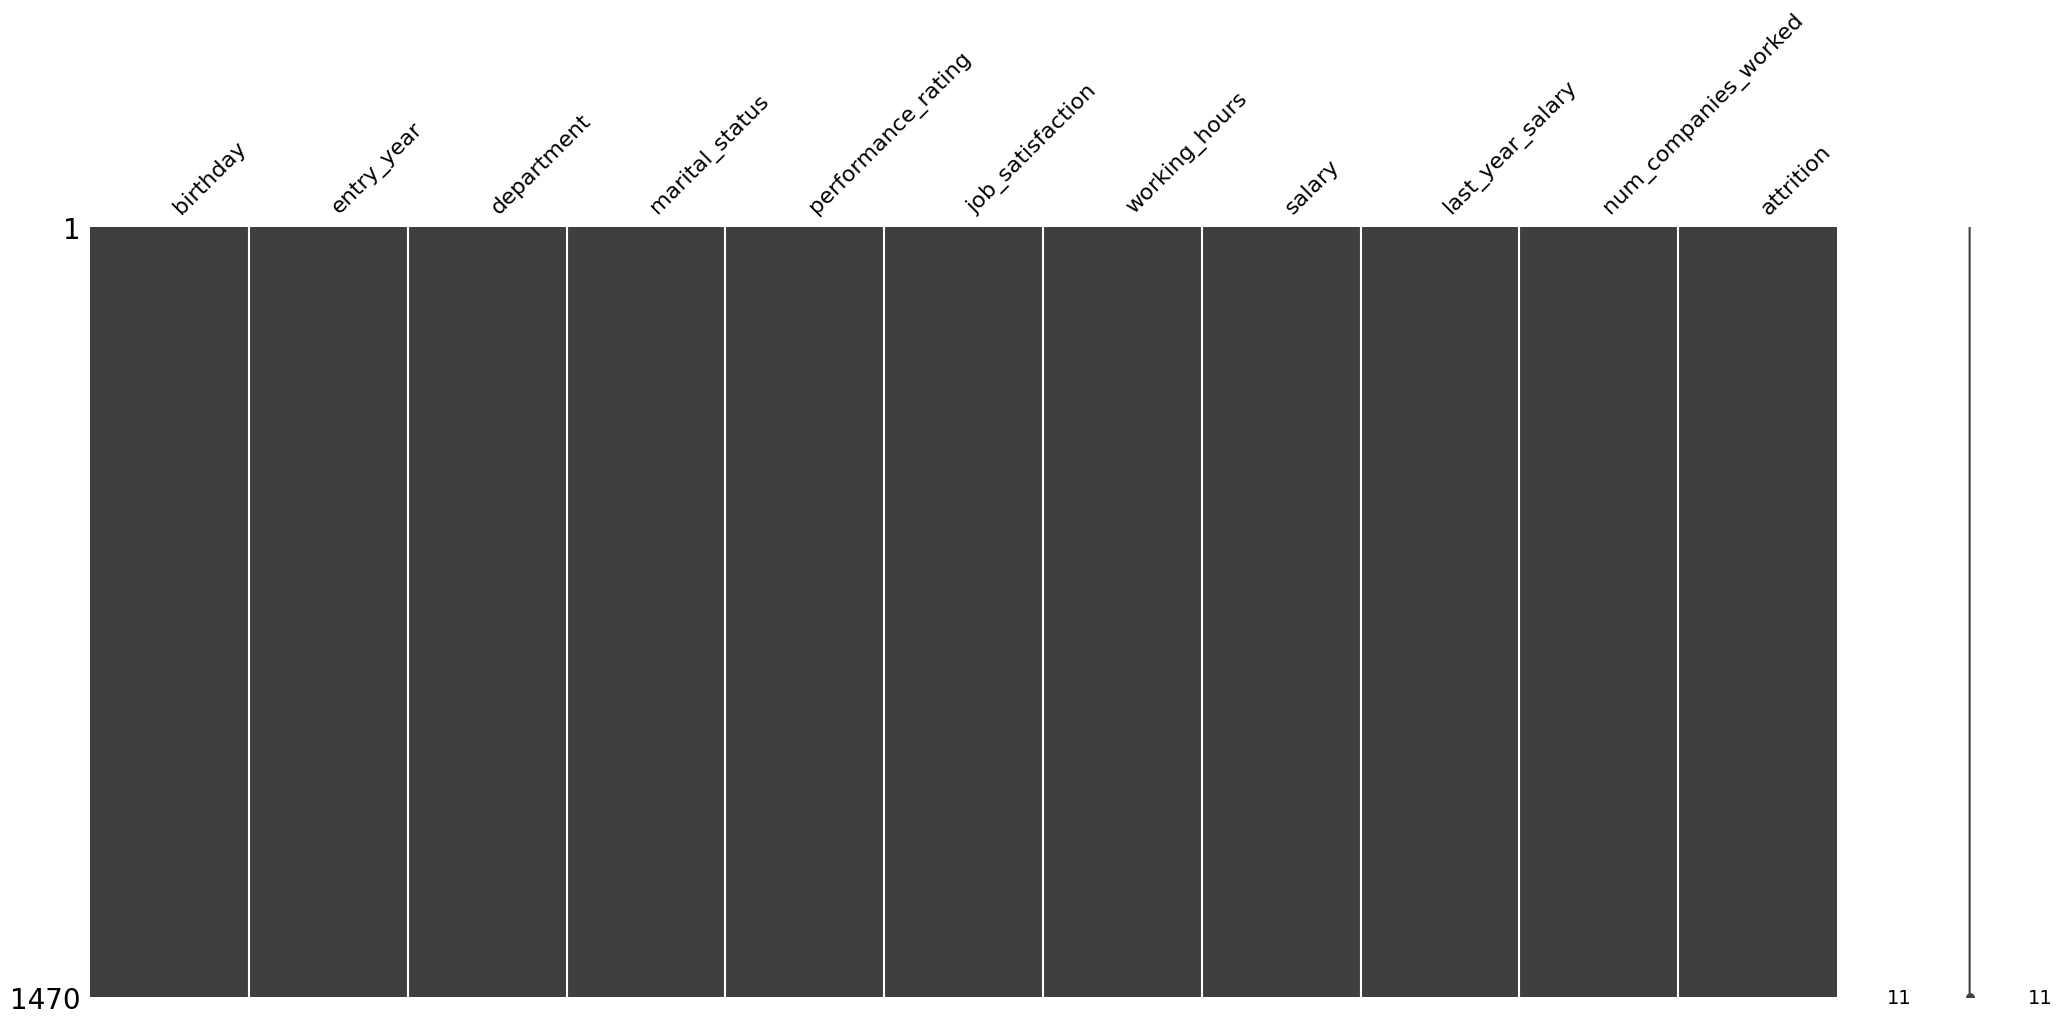

In [22]:
msno.matrix(df);

# 3. 이상치 해결하기

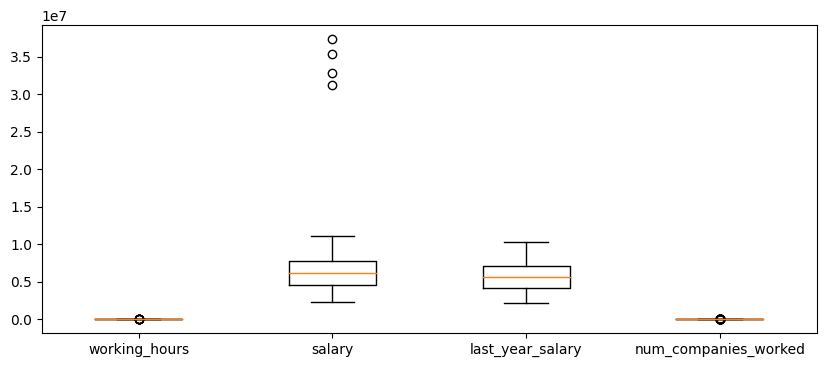

In [23]:
## "working_hours", "salary", "last_year_salary", "num_companies_worked"의 boxplot을 그려보자.

fig, ax = plt.subplots(figsize=(10,4))

ax.boxplot([df["working_hours"], 
            df["salary"], 
            df["last_year_salary"], 
            df["num_companies_worked"]])

ax.set_xticklabels(["working_hours", 
                    "salary", 
                    "last_year_salary", 
                    "num_companies_worked"]);

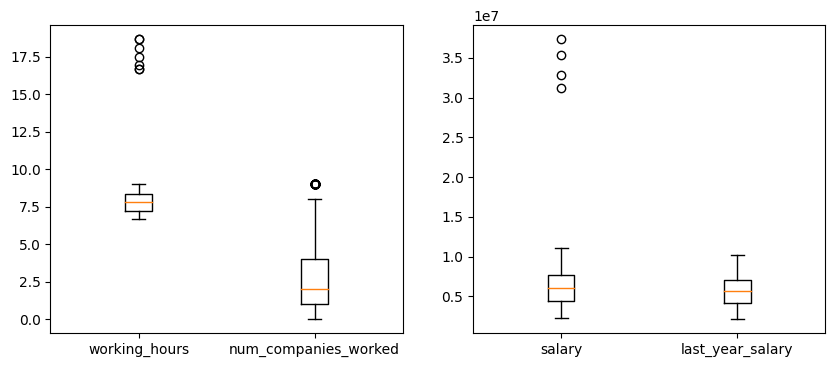

In [24]:
# plot을 나눠서 그리자

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.boxplot([df["working_hours"], 
             df["num_companies_worked"]])
ax1.set_xticklabels(["working_hours", 
                     "num_companies_worked"])

ax2.boxplot([df["salary"], 
             df["last_year_salary"]])
ax2.set_xticklabels(["salary",
                     "last_year_salary"]);

* working_hours

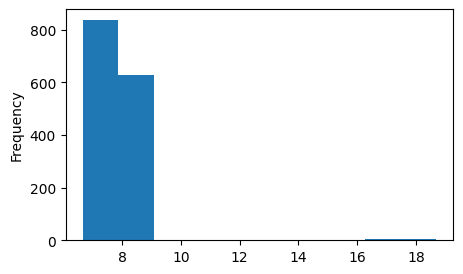

In [25]:
fig, ax = plt.subplots(figsize=(5,3))
df["working_hours"].plot(kind="hist", ax = ax);

In [26]:
df["working_hours"].sort_values(ascending=False).head(10)

430     18.67
1041    18.67
67      18.10
494     17.50
184     16.93
1222    16.67
220     16.67
227      9.00
186      9.00
1038     9.00
Name: working_hours, dtype: float64

In [27]:
working_hours_top_indx = df["working_hours"].sort_values(ascending=False).head(7).index

* num_companies_worked

In [28]:
df["num_companies_worked"].max()

9.0

In [29]:
df[df["num_companies_worked"] == df["num_companies_worked"].max()]

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
4,1994-7-11,2015,rnd,married,high,medium,7.20,3484080,3284389,9.0,no
38,1985-6-22,2015,rnd,married,high,low,6.67,6676800,6220234,9.0,no
50,1973-5-24,1998,rnd,single,high,high,7.80,9162738,8564907,9.0,yes
105,1962-9-20,1991,hr,married,very high,very high,8.33,3198750,2891656,9.0,no
194,1976-5-30,1999,rnd,married,very high,very high,8.67,6885840,6166239,9.0,no
198,1983-3-4,2007,rnd,married,high,high,8.10,8490906,7902928,9.0,no
208,1981-3-28,2016,rnd,married,high,very high,7.20,5388768,5036231,9.0,no
245,1990-12-5,2012,rnd,etc,high,high,8.67,7847060,7370899,9.0,no
287,1983-10-19,2011,rnd,etc,high,very high,8.10,7754616,7229063,9.0,no
290,1972-4-16,1999,rnd,single,high,low,7.80,3093246,2931431,9.0,no


In [30]:
len(df[df["num_companies_worked"] == df["num_companies_worked"].max()])

44

* salary

In [31]:
# 급여가 탑에 있는 사람들을 뽑아보자.
df["salary"].sort_values(ascending=False).head(10)

1204    37349000
642     35369100
1083    32841936
1308    31173000
706     11057040
367     10960650
1451    10630880
653     10602900
314     10497330
863     10470460
Name: salary, dtype: int64

In [32]:
df.loc[df["salary"].sort_values(ascending=False).head(4).index]

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
1204,1973-7-8,2002,sales,married,high,high,8.33,37349000,8830385,2.0,yes
642,1983-8-5,2018,sales,married,high,medium,7.50,35369100,8067033,2.0,no
1083,1981-12-8,2006,rnd,single,high,low,8.10,32841936,7641924,3.0,yes
1308,1983-8-19,2001,sales,married,very high,very high,8.33,31173000,7073840,2.0,no


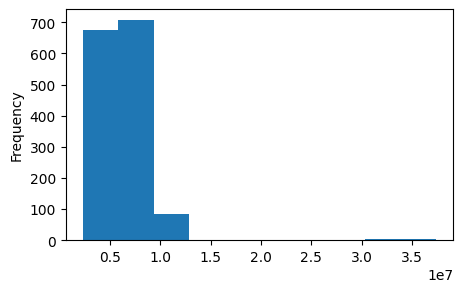

In [33]:
fig, ax = plt.subplots(figsize=(5,3))
df["salary"].plot(kind="hist", ax = ax);

In [34]:
working_hours_top_indx = df["working_hours"].sort_values(ascending=False).head(7).index

In [35]:
salary_top_indx = df["salary"].sort_values(ascending=False).head(4).index

* drop

In [36]:
df.drop(working_hours_top_indx, inplace=True)
df.drop(salary_top_indx, inplace=True)
#같은 코드
#df = df.drop(salary_top_indx)

In [37]:
len(df)

1459

# 4. IQR

In [38]:
q_1 = np.quantile(df["num_companies_worked"], 0.25)
q_2 = np.quantile(df["num_companies_worked"], 0.50)
q_3 = np.quantile(df["num_companies_worked"], 0.75)

In [39]:
print("1사분위값: ", q_1)
print("2사분위값: ", q_2)
print("3사분위값: ", q_3)

1사분위값:  1.0
2사분위값:  2.0
3사분위값:  4.0


In [40]:
xx = [42, 50, 38, 34, 28, 192]

print("xx의 중앙값:", np.median(xx))
print("xx의 평균:", np.mean(xx))

xx의 중앙값: 40.0
xx의 평균: 64.0


In [41]:
## 1,2,3 사분위값을 구해보자.

q_1 = np.quantile(xx, 0.25)
q_2 = np.quantile(xx, 0.50)
q_3 = np.quantile(xx, 0.75)

28, 34, 38, 42, 50, 192

In [42]:
print("1사분위값: ", q_1)
print("2사분위값: ", q_2)
print("3사분위값: ", q_3)

1사분위값:  35.0
2사분위값:  40.0
3사분위값:  48.0


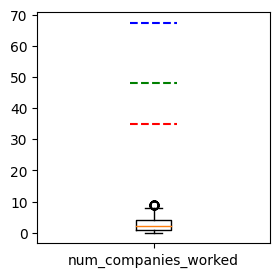

In [43]:
fig, ax = plt.subplots(figsize=(3,3))
ax.boxplot(df["num_companies_worked"])
ax.set_xticklabels(["num_companies_worked"]);

# 1사분위
ax.plot([0.9,1.1], 
        [q_1, q_1], 
        c="red", 
        linestyle="--")

# 3사분위
ax.plot([0.9,1.1], 
        [q_3, q_3], 
        c="green", 
        linestyle="--")

# q_3+1.5*IQR = q_3+1.5*(q_3-q_1)
ax.plot([0.9,1.1], 
        [q_3+1.5*(q_3-q_1), q_3+1.5*(q_3-q_1)], 
        c="blue", 
        linestyle="--");

In [44]:
df = pd.read_csv("../data/hr_data.csv", 
                 encoding="utf-8", 
                 index_col=0)

working_hours_top_indx = df["working_hours"].sort_values(ascending=False).head(7).index
salary_top_indx = df["salary"].sort_values(ascending=False).head(4).index

df.drop(working_hours_top_indx, inplace=True)
df.drop(salary_top_indx, inplace=True)

# 5. 데이터 타입 변경과 특성 생성


In [45]:
df.head(2)

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
0,1980-7-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes
1,1972-11-8,2011,rnd,married,very high,medium,6.93,5170672,4617495,NaN,no


In [46]:
df["performance_rating"].value_counts()

high         1234
very high     225
Name: performance_rating, dtype: int64

In [47]:
df["job_satisfaction"].value_counts()

very high    458
high         438
low          285
medium       278
Name: job_satisfaction, dtype: int64

* numerical
    * birthday $\rightarrow$ age
    * entry_year $\rightarrow$ years_at_company
    * salary&last_year_salary $\rightarrow$ salary_inceasing_rate

* categorical ordinal $\rightarrow$ values
    * performance_rating
    * job_satisfaction
    
* categorical nominal $\rightarrow$ one-hot encoding
    * department
    * marital_status
    * attrition

## 5.1 numerical
    
* birthday $\rightarrow$ age
* entry_year $\rightarrow$ years_at_company
* salary&last_year_salary $\rightarrow$ salary_inceasing_rate

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   birthday              1459 non-null   object 
 1   entry_year            1459 non-null   int64  
 2   department            1459 non-null   object 
 3   marital_status        1135 non-null   object 
 4   performance_rating    1459 non-null   object 
 5   job_satisfaction      1459 non-null   object 
 6   working_hours         1459 non-null   float64
 7   salary                1459 non-null   int64  
 8   last_year_salary      1459 non-null   int64  
 9   num_companies_worked  1199 non-null   float64
 10  attrition             1459 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 136.8+ KB


In [49]:
df["birthday"] = pd.to_datetime(df["birthday"], format="%Y-%m-%d")
df["birth_year"] = df["birthday"].dt.year

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   birthday              1459 non-null   datetime64[ns]
 1   entry_year            1459 non-null   int64         
 2   department            1459 non-null   object        
 3   marital_status        1135 non-null   object        
 4   performance_rating    1459 non-null   object        
 5   job_satisfaction      1459 non-null   object        
 6   working_hours         1459 non-null   float64       
 7   salary                1459 non-null   int64         
 8   last_year_salary      1459 non-null   int64         
 9   num_companies_worked  1199 non-null   float64       
 10  attrition             1459 non-null   object        
 11  birth_year            1459 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 148.2+ K

In [51]:
df.head(2)

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year
0,1980-07-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes,1980
1,1972-11-08,2011,rnd,married,very high,medium,6.93,5170672,4617495,NaN,no,1972


In [52]:
# month, day, weekday, day_name()
df["birthday"].dt.day_name()

0          Sunday
1       Wednesday
2          Monday
3       Wednesday
4          Monday
          ...    
1465    Wednesday
1466       Friday
1467     Saturday
1468       Monday
1469      Tuesday
Name: birthday, Length: 1459, dtype: object

In [53]:
df["age"] = 2021-df["birth_year"]+1

In [54]:
df["years_at_company"] = 2021-df["entry_year"]+1

* $\alpha$: salary_increasing_rate

$$
\text{salary} = \text{last_year_salary}(1 + \frac{\alpha}{100})
$$

$$
\alpha = \frac{\text{salary}}{\text{last_year_salary}}\cdot 100-100
$$

In [55]:
# 입사 1년차는 임금상승률이...?

df[df["years_at_company"] == 1]

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company
23,2000-07-21,2021,rnd,single,high,very high,7.50,8492175,8492175,1.0,no,2000,22,1
127,2002-03-30,2021,sales,single,high,high,6.93,3990896,3990896,1.0,yes,2002,20,1
296,2003-02-03,2021,rnd,single,high,high,7.80,5154084,5154084,1.0,yes,2003,19,1
301,2003-03-01,2021,sales,single,high,high,7.20,5903064,5903064,1.0,no,2003,19,1
457,2003-05-30,2021,sales,single,high,medium,7.50,6086700,6086700,1.0,yes,2003,19,1
615,1994-06-01,2021,rnd,married,high,very high,6.67,4083200,4083200,1.0,no,1994,28,1
727,2003-12-18,2021,rnd,single,high,very high,6.67,5790600,5790600,1.0,no,2003,19,1
828,2003-12-19,2021,rnd,single,high,high,7.50,7185150,7185150,1.0,yes,2003,19,1
972,2003-02-04,2021,rnd,single,high,very high,8.67,10140260,10140260,NaN,no,2003,19,1
1153,2003-05-05,2021,sales,single,high,very high,8.33,6961750,6961750,NaN,yes,2003,19,1


In [56]:
df["salary_increasing_rate"] = df["salary"]/df["last_year_salary"]*100-100

In [57]:
df

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company,salary_increasing_rate
0,1980-07-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes,1980,42,9,5.690003
1,1972-11-08,2011,rnd,married,very high,medium,6.93,5170672,4617495,NaN,no,1972,50,11,11.980024
2,1984-05-07,2014,rnd,single,high,high,9.00,9898200,9176045,6.0,yes,1984,38,8,7.870003
3,1988-10-19,2013,rnd,married,high,high,8.33,5673500,5362476,1.0,no,1988,34,9,5.800007
4,1994-07-11,2015,rnd,married,high,medium,7.20,3484080,3284389,9.0,no,1994,28,7,6.080005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1985-02-13,2004,rnd,married,high,very high,7.50,3488175,3214315,4.0,no,1985,37,18,8.520011
1466,1982-05-21,2012,rnd,married,high,low,8.33,4442500,4113806,4.0,no,1982,40,10,7.990022
1467,1994-02-05,2015,rnd,married,very high,medium,8.33,8715500,7908802,1.0,no,1994,28,7,10.200002
1468,1972-04-17,2004,sales,married,high,medium,8.67,6804200,6333023,2.0,no,1972,50,18,7.440001


## 5.2 categorical ordinal $\rightarrow$ values
* performance_rating
* job_satisfaction

In [58]:
df["performance_rating"].value_counts()

high         1234
very high     225
Name: performance_rating, dtype: int64

In [59]:
df["job_satisfaction"].value_counts()

very high    458
high         438
low          285
medium       278
Name: job_satisfaction, dtype: int64

In [60]:
level = {"low":0, "medium":1, "high":2, "very high":3}

In [61]:
df["performance_rating"] = df["performance_rating"].replace(level)
df["job_satisfaction"] = df["job_satisfaction"].replace(level)

In [62]:
df.head()

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company,salary_increasing_rate
0,1980-07-20,2013,sales,single,2,3,8.33,9431500,8923739,8.0,yes,1980,42,9,5.690003
1,1972-11-08,2011,rnd,married,3,1,6.93,5170672,4617495,NaN,no,1972,50,11,11.980024
2,1984-05-07,2014,rnd,single,2,2,9.00,9898200,9176045,6.0,yes,1984,38,8,7.870003
3,1988-10-19,2013,rnd,married,2,2,8.33,5673500,5362476,1.0,no,1988,34,9,5.800007
4,1994-07-11,2015,rnd,married,2,1,7.20,3484080,3284389,9.0,no,1994,28,7,6.080005


## 5.3 categorical nominal $\rightarrow$ one-hot encoding
* department
* marital_status
* attrition

In [63]:
df["department"].value_counts()

rnd      956
sales    441
hr        62
Name: department, dtype: int64

In [64]:
## "marital_status" 특성은 어떤 카테고리를 가지고 있고, 카테고리별 개수는?
df["marital_status"].value_counts()

married    669
single     466
Name: marital_status, dtype: int64

In [65]:
## ""attrition" 특성은 어떤 카테고리를 가지고 있고, 카테고리별 개수는?
df["attrition"].value_counts()

no     1225
yes     234
Name: attrition, dtype: int64

In [66]:
pd.get_dummies(df[["department", "marital_status"]], 
               prefix=["dep", "ms"], 
               prefix_sep="+",
               )

,dep+hr,dep+rnd,dep+sales,ms+married,ms+single
0,0,0,1,0,1
1,0,1,0,1,0
2,0,1,0,0,1
3,0,1,0,1,0
4,0,1,0,1,0
...,...,...,...,...,...
1465,0,1,0,1,0
1466,0,1,0,1,0
1467,0,1,0,1,0
1468,0,0,1,1,0


In [67]:
pd.get_dummies(df[["department", "marital_status"]], 
               prefix=["dep", "ms"], 
               prefix_sep="+",
               drop_first=True
               )

,dep+rnd,dep+sales,ms+single
0,0,1,1
1,1,0,0
2,1,0,1
3,1,0,0
4,1,0,0
...,...,...,...
1465,1,0,0
1466,1,0,0
1467,1,0,0
1468,0,1,0


In [68]:
categorical_one_hot = pd.get_dummies(df[["department", "marital_status"]])
categorical_one_hot

,department_hr,department_rnd,department_sales,marital_status_married,marital_status_single
0,0,0,1,0,1
1,0,1,0,1,0
2,0,1,0,0,1
3,0,1,0,1,0
4,0,1,0,1,0
...,...,...,...,...,...
1465,0,1,0,1,0
1466,0,1,0,1,0
1467,0,1,0,1,0
1468,0,0,1,1,0


In [69]:
df = pd.merge(df, categorical_one_hot, left_index=True, right_index=True)

In [70]:
df.head()

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_married,marital_status_single
0,1980-07-20,2013,sales,single,2,3,8.33,9431500,8923739,8.0,yes,1980,42,9,5.690003,0,0,1,0,1
1,1972-11-08,2011,rnd,married,3,1,6.93,5170672,4617495,NaN,no,1972,50,11,11.980024,0,1,0,1,0
2,1984-05-07,2014,rnd,single,2,2,9.00,9898200,9176045,6.0,yes,1984,38,8,7.870003,0,1,0,0,1
3,1988-10-19,2013,rnd,married,2,2,8.33,5673500,5362476,1.0,no,1988,34,9,5.800007,0,1,0,1,0
4,1994-07-11,2015,rnd,married,2,1,7.20,3484080,3284389,9.0,no,1994,28,7,6.080005,0,1,0,1,0


In [71]:
df["attrition"] = pd.get_dummies(df["attrition"], drop_first=True)

In [72]:
df

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_married,marital_status_single
0,1980-07-20,2013,sales,single,2,3,8.33,9431500,8923739,8.0,1,1980,42,9,5.690003,0,0,1,0,1
1,1972-11-08,2011,rnd,married,3,1,6.93,5170672,4617495,NaN,0,1972,50,11,11.980024,0,1,0,1,0
2,1984-05-07,2014,rnd,single,2,2,9.00,9898200,9176045,6.0,1,1984,38,8,7.870003,0,1,0,0,1
3,1988-10-19,2013,rnd,married,2,2,8.33,5673500,5362476,1.0,0,1988,34,9,5.800007,0,1,0,1,0
4,1994-07-11,2015,rnd,married,2,1,7.20,3484080,3284389,9.0,0,1994,28,7,6.080005,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1985-02-13,2004,rnd,married,2,3,7.50,3488175,3214315,4.0,0,1985,37,18,8.520011,0,1,0,1,0
1466,1982-05-21,2012,rnd,married,2,0,8.33,4442500,4113806,4.0,0,1982,40,10,7.990022,0,1,0,1,0
1467,1994-02-05,2015,rnd,married,3,1,8.33,8715500,7908802,1.0,0,1994,28,7,10.200002,0,1,0,1,0
1468,1972-04-17,2004,sales,married,2,1,8.67,6804200,6333023,2.0,0,1972,50,18,7.440001,0,0,1,1,0


In [73]:
df[df.columns[2:]]

,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_married,marital_status_single
0,sales,single,2,3,8.33,9431500,8923739,8.0,1,1980,42,9,5.690003,0,0,1,0,1
1,rnd,married,3,1,6.93,5170672,4617495,NaN,0,1972,50,11,11.980024,0,1,0,1,0
2,rnd,single,2,2,9.00,9898200,9176045,6.0,1,1984,38,8,7.870003,0,1,0,0,1
3,rnd,married,2,2,8.33,5673500,5362476,1.0,0,1988,34,9,5.800007,0,1,0,1,0
4,rnd,married,2,1,7.20,3484080,3284389,9.0,0,1994,28,7,6.080005,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,rnd,married,2,3,7.50,3488175,3214315,4.0,0,1985,37,18,8.520011,0,1,0,1,0
1466,rnd,married,2,0,8.33,4442500,4113806,4.0,0,1982,40,10,7.990022,0,1,0,1,0
1467,rnd,married,3,1,8.33,8715500,7908802,1.0,0,1994,28,7,10.200002,0,1,0,1,0
1468,sales,married,2,1,8.67,6804200,6333023,2.0,0,1972,50,18,7.440001,0,0,1,1,0


In [74]:
df.shape

(1459, 20)

In [75]:
df.columns

Index(['birthday', 'entry_year', 'department', 'marital_status',
       'performance_rating', 'job_satisfaction', 'working_hours', 'salary',
       'last_year_salary', 'num_companies_worked', 'attrition', 'birth_year',
       'age', 'years_at_company', 'salary_increasing_rate', 'department_hr',
       'department_rnd', 'department_sales', 'marital_status_married',
       'marital_status_single'],
      dtype='object')

In [76]:
# 저장
# df.to_csv("../data/hr_data_preprocessing.csv", encoding="utf-8")